# Планирование рекламных кампаний

Проект выполнен для выявления ставки на потенциально популярный продукт и планирования рекламных кампаний для интернет-магазина «Стримчик»

Цель: выявить определяющие успешность игры закономерности.

Входные данные из открытых источников — данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation)

План работы:
1. Рассмотреть данные
2. Провести их преодобработку
3. Провести исследовательский анализ
4. Составить портрет пользователя каждого региона
5. Проверить гипотезы
6. Сделать вывод


## Этап 1. Обзор данных

In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats as st

In [ ]:
data = pd.read_csv('/datasets/games.csv')

In [ ]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [ ]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


После обзора данных выявлены неверные названия столбцов, которые требуется привести к нижнему регистру. Также найдены столбцы, тип данных которых требуется исправить.

## Этап 2. Предобработка данных

- Приведем названия столбцов к нижнему регистру.

In [ ]:
data.columns = data.columns.str.lower()
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


- Посмотрим информацию о типах данных и преобразуем по необходимости.

In [ ]:
data.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

In [ ]:
data['year_of_release'] = data['year_of_release'].astype('Int64') 
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce', downcast='float') 
data['user_score'] = data['user_score'].astype('float64') 

In [ ]:
data.dtypes

name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

Заменили тип данных в столбце с годом (year_of_release), так как он всегда целочисленных и оценка пользователей(user_score) должна иметь численный вид.

- Пропуски в столбцах

In [ ]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [ ]:
# выведем также в процентах
data.isna().mean()*100

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         54.591684
rating             40.478612
dtype: float64

In [ ]:
data['rating'] = data['rating'].fillna('Unknown')

In [ ]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating                0
dtype: int64

Удалось заполнить только пропуски в столбце рейтинга, так как для остальных нельзя предложить очевидную замену.

Причинами появления пропусков в исходных данных могут быть: ошибки при вводе данных, намеренно сделанный пропуск в данных, пропуски из-за отсутствия данных в других столбца, технические сбои.

tbd (to be determined = будет определено) для неизвестных значений столбца.

- Проверка данных на дубликаты

In [ ]:
data.duplicated().sum()

0

- Создание столбца с суммарными продажами во всех регионах.

In [ ]:
data['sales_sum'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data ['other_sales']

In [ ]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_sum
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38


## Этап 3. Исследовательский анализ данных


- Сколько игр выпускалось в разные годы. 

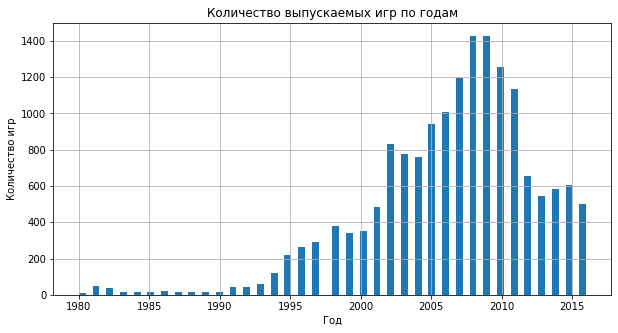

In [ ]:
year_hist = data['year_of_release'].hist(bins = 74, grid = True, figsize = (10,5))
year_hist.set_ylabel('Количество игр')
year_hist.set_xlabel('Год')
year_hist.set_title('Количество выпускаемых игр по годам')
plt.show()

Не все периоды важны для исследования. С начала 90-ых был заметных подъем в количестве проданных игр, но с 2011 продажи упали в два раза.

Самыми актуальными данными можно считать продажи с 2011 года, за последние 5 лет. 

In [ ]:
actual = data[data['year_of_release'] > 2011]
sales = actual.pivot_table(index = ['platform', 'year_of_release'], values = 'sales_sum', aggfunc = 'sum')
last_top_sales = sales[sales['sales_sum'] >= 5]
last_top_sales

sales_sum
platform year_of_release           
3DS      2012                 51.36
         2013                 56.57
         2014                 43.76
         2015                 27.78
         2016                 15.14
DS       2012                 11.01
PC       2012                 23.22
         2013                 12.38
         2014                 13.28
         2015                  8.52
         2016                  5.25
PS3      2012                107.36
         2013                113.25
         2014                 47.76
         2015                 16.82
PS4      2013                 25.99
         2014                100.00
         2015                118.90
         2016                 69.25
PSP      2012                  7.69
PSV      2012                 16.19
         2013                 10.59
         2014                 11.90
         2015                  6.25
Wii      2012                 21.71
         2013                  8.59
WiiU     2012                 17.56
         2013                 21.65
         2014                 22.03
         2015                 16.35
X360     2012                 99.74
         2013                 88.58
         2014                 34.74
         2015                 11.96
XOne     2013                 18.96
         2014                 54.07
         2015                 60.14
         2016                 26.15

- Изменяемость продаж по платформам

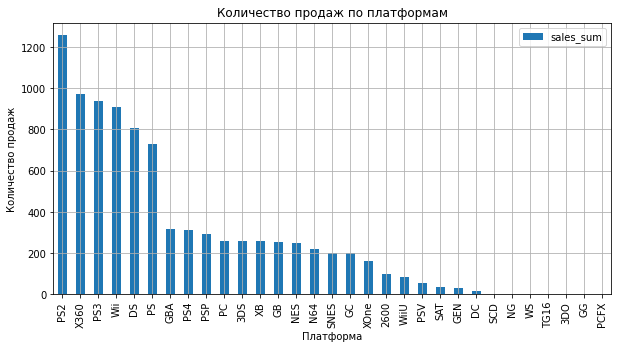

In [ ]:
platform_sales = data.pivot_table(index='platform', values='sales_sum', aggfunc='sum').sort_values(by='sales_sum', ascending=False)
platform_sales.plot(y = 'sales_sum', kind = 'bar', grid = True, figsize=(10,5), title = 'Количество продаж по платформам', ylabel = 'Количество продаж', xlabel = 'Платформа')
plt.show()

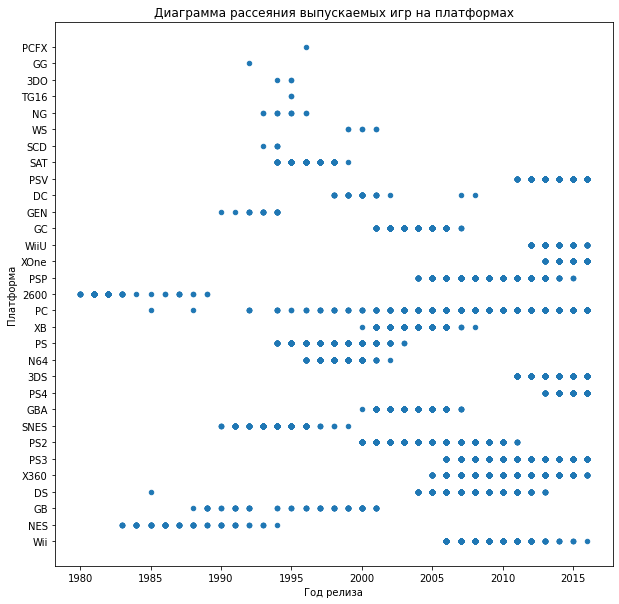

In [ ]:
data.plot(x = 'year_of_release', y = 'platform', kind = 'scatter', figsize = (10,10), title = 'Диаграмма рассеяния выпускаемых игр на платформах', ylabel = 'Платформа', xlabel = 'Год релиза')
plt.show()

После построения диаграммы рассеяния по годам для каждой платформы можно заметить, что игры появляются и исчезают в разные года на примерно одинаковый срок.
Cрок для появления новых и исчезновения старых платформ составляет в среднем 8-10 лет.  

In [ ]:
actual.groupby('platform')['sales_sum'].sum().sort_values(ascending = False)

platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
PSP      11.19
Name: sales_sum, dtype: float64

Топ-5 платформами за последние 5 лет оказались - PS3, X360, PS4, 3DS и XOne.

In [ ]:
top_platform = actual.query('platform == "PS3" or platform == "X360" or platform == "PS4" or platform == "3DS" or platform == "XOne"')

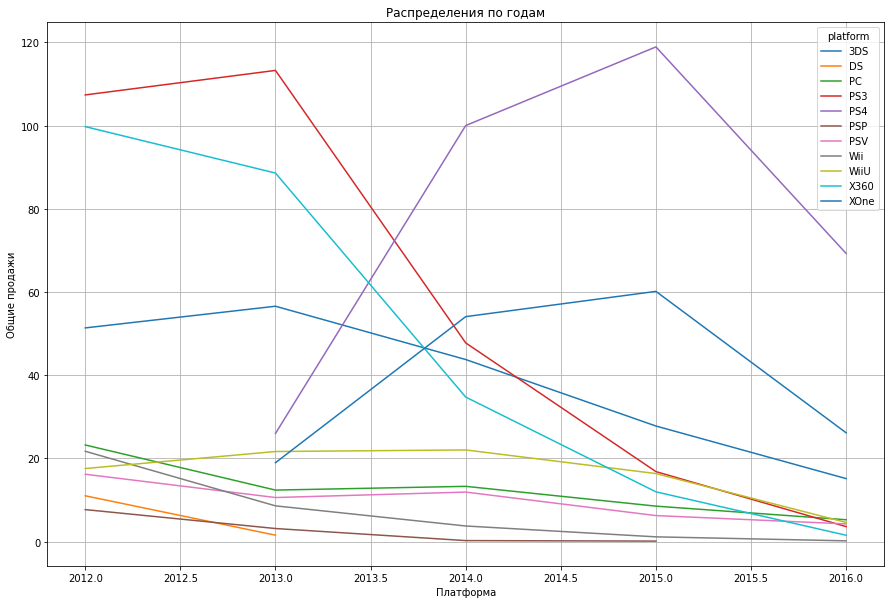

In [ ]:
actual.groupby(['platform', 'year_of_release'])['sales_sum'].sum().unstack('platform').plot(figsize = (15, 10), grid=True, title = 'Распределения по годам', ylabel = 'Общие продажи', xlabel = 'Платформа')
plt.show()

По распределению по годам видно, что продажи у всех платформ падали к 2016 году. Можно отметить, что продажи только платформ XOne и PS4 росли.

- Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

(0.0, 2.8)

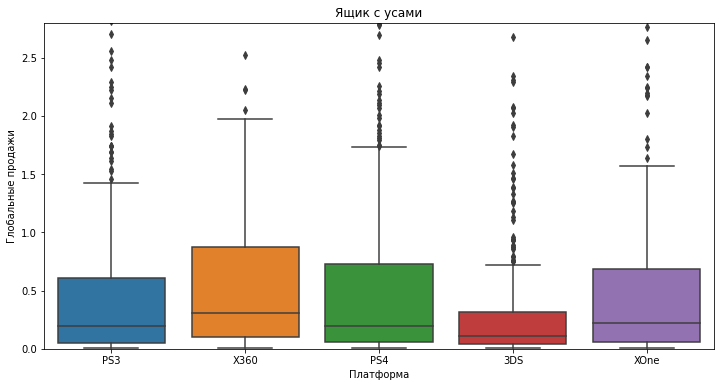

In [ ]:
plt.figure(figsize = (12,6))
sb.boxplot(data = top_platform, x = 'platform', y = 'sales_sum')
plt.title('Ящик с усами')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи')
plt.ylim(0,2.8)


На графике видно, что медианные значения продаж для платформ низкие. Лидерами по продажам являются X360, PS4, XOne и PS3. 

- Влияние отзывов пользователей и критиков на продажи внутри одной популярной платформы - X360. 

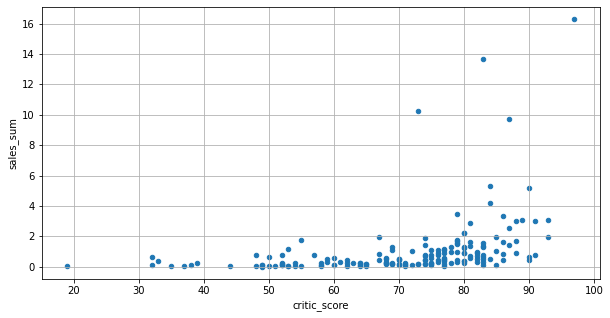

Корреляция между отзывами критиков и продажами: 0.3605734888507336


In [ ]:
# Построение диаграммы рассения
X360 = actual.query("platform == 'X360'")
X360.plot(x = 'critic_score', y = 'sales_sum', kind='scatter', grid=True, figsize=(10,5))
plt.show()

# Подсчет коэффициента корреляции
x360_critic = X360['critic_score'].corr(X360['sales_sum'])
print('Корреляция между отзывами критиков и продажами:', x360_critic)

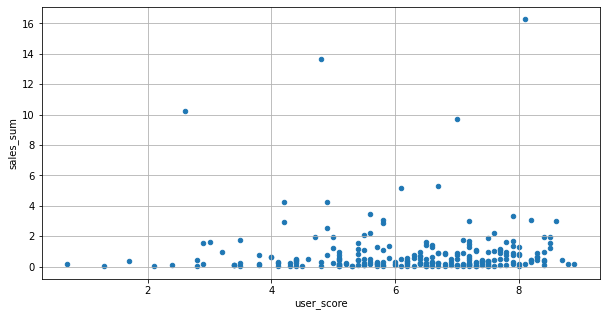

Корреляция между отзывами пользователей и продажами: 0.3605734888507336


In [ ]:
# Построение диаграммы рассения
X360.plot(x = 'user_score', y = 'sales_sum', kind='scatter', grid=True, figsize=(10,5))
plt.show()

# Подсчет коэффициента корреляции
x360_user = X360['critic_score'].corr(X360['sales_sum'])
print('Корреляция между отзывами пользователей и продажами:', x360_critic)

Корреляция между отзывами критиков и продажами умеренная. Коэффциент положительный, значит с ростом одной величины растет и другая.

Корреляция между отзывами пользователей и продажами также положительная, но низкая. Значит, перед покупкой люди обращают внимание на отзывы. Но больше влияют отзыввы критиков, чем пользовательские.

Рассмотрим диаграммы рассения и корреляции для остальных поппулярных платформ.

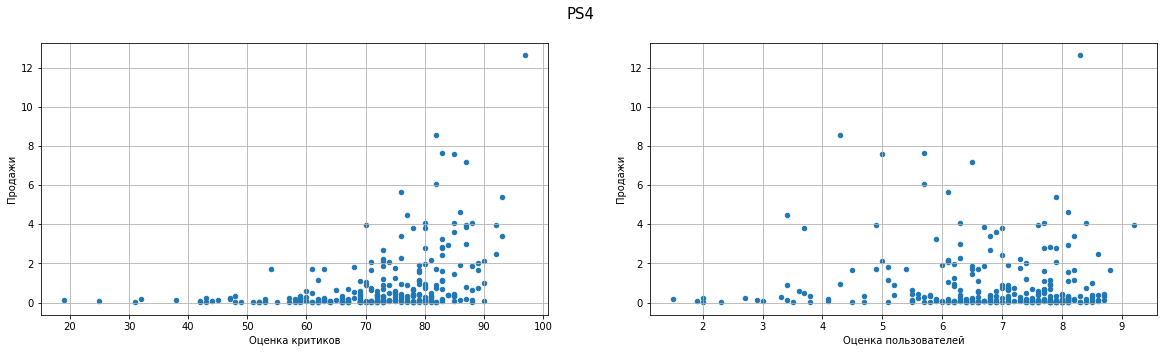

Корреляция между отзывами критиков и продажами: 0.40656790206178095
Корреляция между отзывами пользователей и продажами: -0.031957109005188264


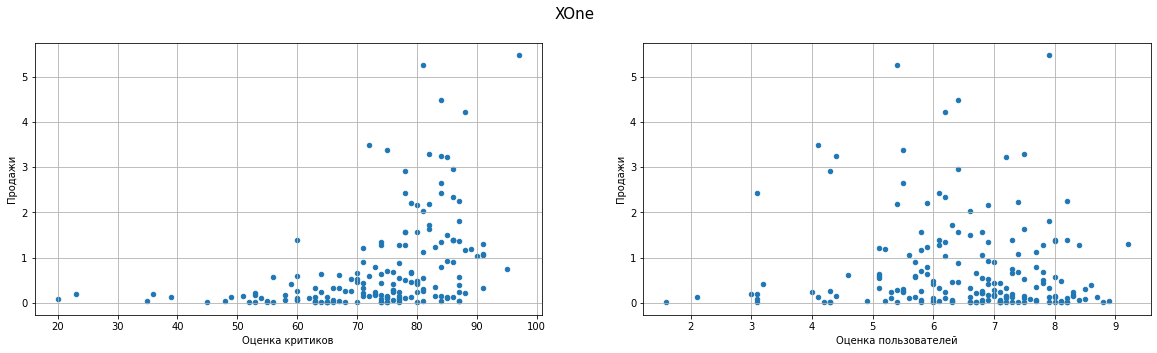

Корреляция между отзывами критиков и продажами: 0.4169983280084017
Корреляция между отзывами пользователей и продажами: -0.06892505319711206


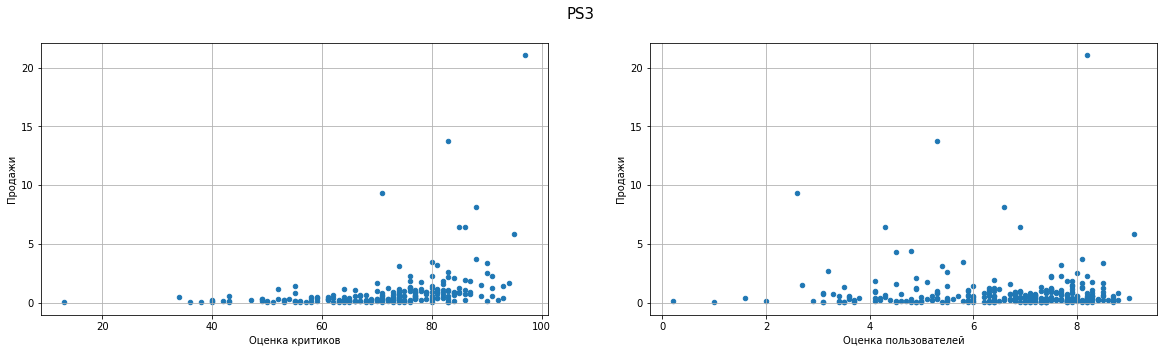

Корреляция между отзывами критиков и продажами: 0.3314972592629587
Корреляция между отзывами пользователей и продажами: -0.005143521263447908


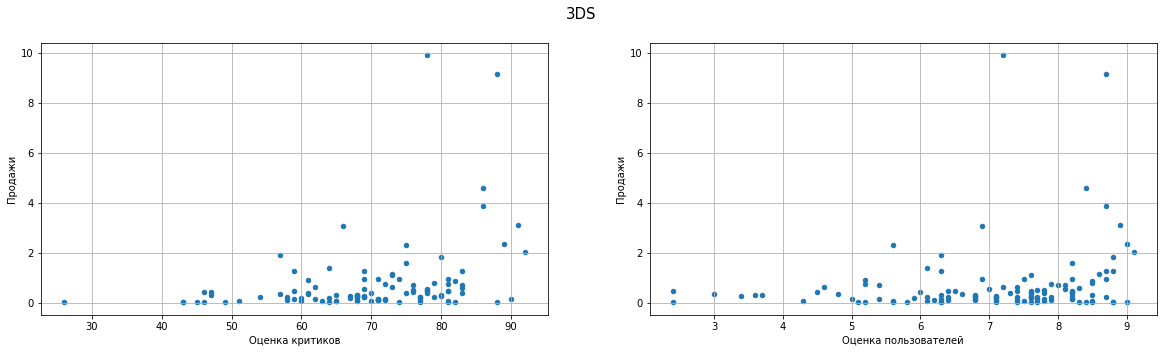

Корреляция между отзывами критиков и продажами: 0.3208028695360785
Корреляция между отзывами пользователей и продажами: 0.19758261153521017


In [ ]:
def diagrams(name):
    platform = actual.query("platform == @name")
    fig, ax = plt.subplots(1 ,2, figsize=(20,5))
    fig.suptitle(name, fontsize=15)
    platform.plot(x = 'critic_score', y = 'sales_sum', kind='scatter', grid=True, ax=ax[0], ylabel = 'Продажи', xlabel = 'Оценка критиков')
    platform.plot(x = 'user_score', y = 'sales_sum', kind='scatter', grid=True, ax=ax[1], ylabel = 'Продажи', xlabel = 'Оценка пользователей')
    plt.show()
    cor_c = platform['critic_score'].corr(platform['sales_sum'])
    cor_u = platform['user_score'].corr(platform['sales_sum'])
    print('Корреляция между отзывами критиков и продажами:', cor_c)
    print('Корреляция между отзывами пользователей и продажами:', cor_u)


popular = ['PS4', 'XOne', 'PS3', '3DS']

for i in popular:
    diagrams(i)

Все коэффициенты у отзывов критиков положительные - есть слабая линейная связь между отзывами и продажами. Пользовательские оценки не влияют на количество продаж игр.
Значит, для всех платформ влияющим фактором для покупателей являются отзывы критиков.

- Общее распределение игр по жанрам

In [ ]:
genre_sales = top_platform.pivot_table(index='genre', values='sales_sum',aggfunc=['count', 'sum','mean'])
genre_sales.columns = ['Кол-во игр', 'Общая прибыль', 'Средняя прибыль']
genre_sales.sort_values(by='Средняя прибыль', ascending=False)

,Кол-во игр,Общая прибыль,Средняя прибыль
genre,,,
Shooter,180,282.11,1.567278
Sports,203,167.81,0.826650
Role-Playing,219,151.26,0.690685
Platform,53,34.13,0.643962
Action,657,376.25,0.572679
Racing,82,42.18,0.514390
Simulation,49,25.16,0.513469
Fighting,83,35.53,0.428072
Misc,116,48.78,0.420517


(0.0, 5.0)

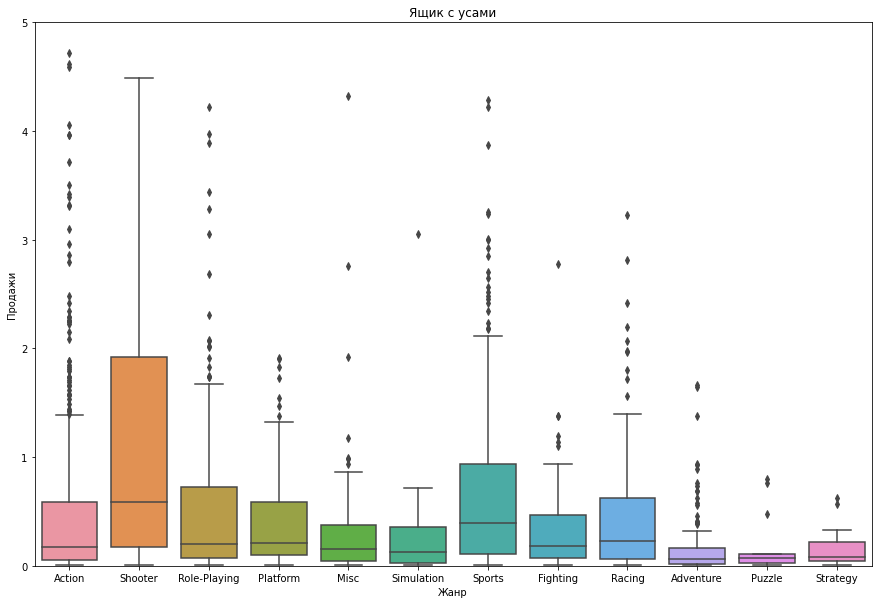

In [ ]:
plt.figure(figsize = (15,10))
sb.boxplot(data = top_platform, x = 'genre', y = 'sales_sum')
plt.title('Ящик с усами')
plt.xlabel('Жанр')
plt.ylabel('Продажи')
plt.ylim(0, 5)

Самым прибыльным жанром является shooter. На втором месте sports. Жанры с низкой прибылью по графику - strategy и adventure.

## Этап 4. Портрет пользователя для каждого региона


- Самые популярные платформы (топ-5)

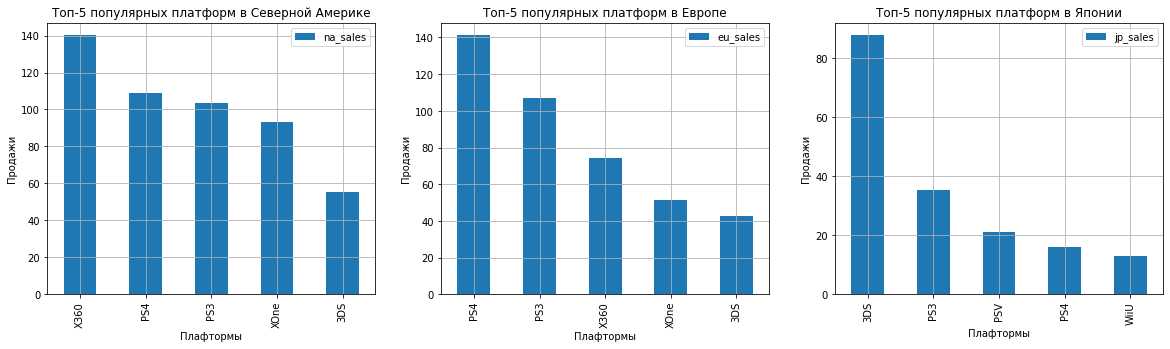

In [ ]:
platform_sales_na = actual.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head()
platform_sales_eu = actual.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head()
platform_sales_jp = actual.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head()

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(20,5))

platform_sales_na.plot(y = 'na_sales', kind = 'bar', grid = True, ax=ax[0], title = 'Топ-5 популярных платформ в Северной Америке', ylabel = 'Продажи', xlabel = 'Плафтормы')
platform_sales_eu.plot(y = 'eu_sales', kind = 'bar', grid = True, ax=ax[1], title = 'Топ-5 популярных платформ в Европе', ylabel = 'Продажи', xlabel = 'Плафтормы')
platform_sales_jp.plot(y = 'jp_sales', kind = 'bar', grid = True, ax=ax[2], title = 'Топ-5 популярных платформ в Японии', ylabel = 'Продажи', xlabel = 'Плафтормы')
plt.show()

Таким образом, топ-5 популярных платформ для каждого региона разнится. Также разными является количество продаж: для Северной Америки максимальная прибыль составляет около 240 миллионов копий, для Европы около 160 миллионов, для Японии около 100 миллионов. Это можно объяснить повышенным интересом к играм в Северной Америке.

- Самые популярные жанры (топ-5)

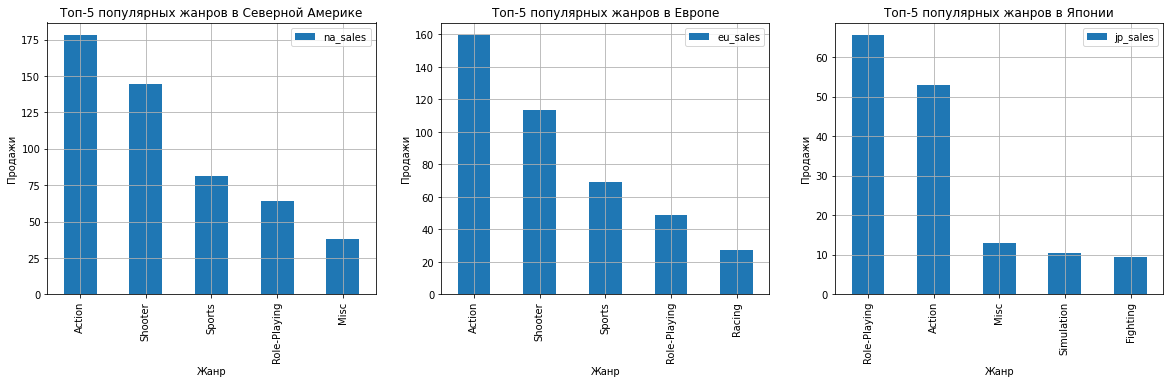

In [ ]:
genre_sales_na = actual.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head()
genre_sales_eu = actual.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head()
genre_sales_jp = actual.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head()

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(20,5))

genre_sales_na.plot(y = 'na_sales', kind = 'bar', grid = True, ax=ax[0], title = 'Топ-5 популярных жанров в Северной Америке', ylabel = 'Продажи', xlabel = 'Жанр')
genre_sales_eu.plot(y = 'eu_sales', kind = 'bar', grid = True, ax=ax[1], title = 'Топ-5 популярных жанров в Европе', ylabel = 'Продажи', xlabel = 'Жанр')
genre_sales_jp.plot(y = 'jp_sales', kind = 'bar', grid = True, ax=ax[2], title = 'Топ-5 популярных жанров в Японии', ylabel = 'Продажи', xlabel = 'Жанр')
plt.show()

Топ-5 популярных жанров разные для каждого региона. Для Северной Америки и Европы лидирующую позицию занял жанр Action, а для Японии - Role-playing.

- Влияние рейтинга ESRB на продажи в каждом регионе

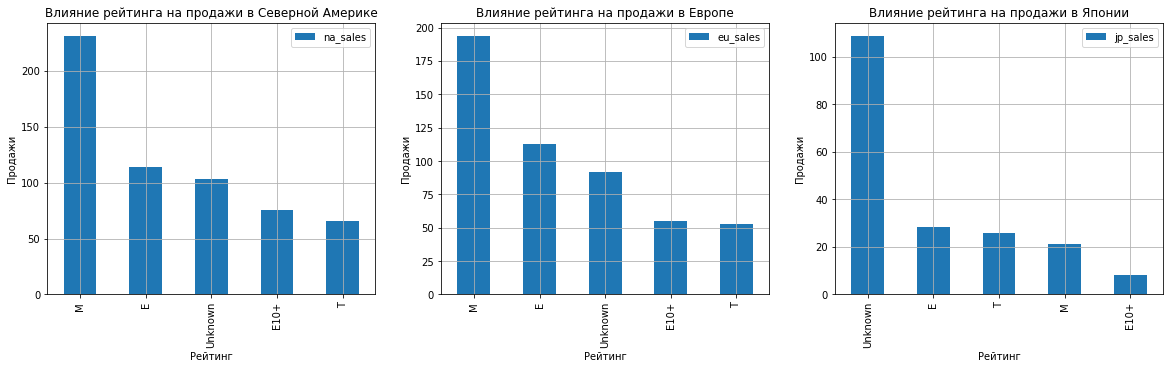

In [ ]:
esrb_sales_na = actual.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head()
esrb_sales_eu = actual.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head()
esrb_sales_jp = actual.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head()

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(20,5))

esrb_sales_na.plot(y = 'na_sales', kind = 'bar', grid = True, ax=ax[0], title = 'Влияние рейтинга на продажи в Северной Америке', ylabel = 'Продажи', xlabel = 'Рейтинг')
esrb_sales_eu.plot(y = 'eu_sales', kind = 'bar', grid = True, ax=ax[1], title = 'Влияние рейтинга на продажи в Европе', ylabel = 'Продажи', xlabel = 'Рейтинг')
esrb_sales_jp.plot(y = 'jp_sales', kind = 'bar', grid = True, ax=ax[2], title = 'Влияние рейтинга на продажи в Японии', ylabel = 'Продажи', xlabel = 'Рейтинг')
plt.show()

В каждом регионе разное количество продаж по рейтингам. Предпочтительное всего рейтинги с показателем М и Е. В Японии популярны игры без рейтинга. Это можно объяснить тем, что в Японии присуждением рейтингов занимается CERO, а не ESRB.

## Этап 5. Проверка гипотез

Воспользуемся для проверки гипотез методом scipy.stats.ttest_ind(), так как нужно сопоставить средних двух генральных совокупностей по взятым выборкам.

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нужно проверить одинаковы ли средние показатели пользовательских рейтингов для двух платформ, поэтому сформулируем гипотезы следующим образом:

H_0: Пользовательский рейтинг платформы Xbox One = Пользовательский рейтинг платформы PC

H_1: Пользовательский рейтинг платформы Xbox One ≠ Пользовательский рейтинг платформы PC

In [ ]:
xbox = data[data['platform'] == "XOne"]['user_score'].dropna()
pc = data[data['platform'] == "PC"]['user_score'].dropna()

alpha = .05 

results = st.ttest_ind(
    xbox, 
    pc,
    equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 4.935069725426706e-06
Отвергаем нулевую гипотезу


Значение p-value равно менее 1%, нулевая гипотеза отвергнута - средние пользовательские рейтинги платформ Xbox One и PC разные.

- Средние пользовательские рейтинги жанров Action и Sports разные.

H_0: Пользовательский рейтинг жанра Action = Пользовательский рейтинг жанра Sports

H_1: Пользовательский рейтинг жанра Action ≠ Пользовательский рейтинг жанра Sports

In [ ]:
action = data[data['genre']=="Action"]['user_score'].dropna()
sports = data[data['genre']=="Sports"]['user_score'].dropna()

alpha = .05

results = st.ttest_ind(
    action, 
    sports,
    equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.11483815981646321
Не получилось отвергнуть нулевую гипотезу


Значит, что средние пользовательские рейтинги жанров Action и Sports равны или приблизительно равны.

## Итоги исследования

Перед исследованием были получены данные из открытых источников о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). В данных были пропуски и ошибки. После их предобработки все было устранено. В пункте 2 был добавлен стобец с суммарными продажами, необходимый для исследовательского анализа.

В ходе анализа было выяснено, что с 90-х годов стремительно росли продажи, но после 2009 года они начали уменьшаться. Это можно объяснить сменой технологий пользователей и небольшой потерей интереса к компьютерным играм. Также были выявлены популярные платформы: PS3, X360, PS4, 3DS и XOne. Потенциально прибыльнами из них были PS4 и XOne. Cрок для появления новых и исчезновения старых платформ составляет в среднем 8-10 лет.  

Для дальнейшего исследования использовались популярные платформы и актуальный период. Актуальным периодом были 2012-2016 года.

У популярных платформ выявлена взаимосвязь между продажами и оценками критиков. Пользовательские оценки на продажи не влияют. Самым прибыльным жанром в выбранный период был Shooter, второе место занял жанр Sports.

Составление портрета пользователей показало, что для каждого региона свои топ-5 платформ, популярные жанры и предпочтительные рейтинги. Для некоторых регионов есть сходства, но лучше всего запускать рекламные кампании отдельно для каждого региона, опираясь на составленный портрет и выявленные взаимосвязи.